In [1]:
import time
import json
import numpy as np
import matplotlib.pyplot as plt

from pc import PS
from modules import ADC,DAC,CHIP
from cimCommand import CMD,CmdData,Packet
from cimCommand.singleCmdInfo import *

from util import plot_v_cond


from matplotlib.colors import BoundaryNorm
from matplotlib.colors import Normalize

In [2]:
chip=CHIP(PS(host="192.168.1.10", port = 7, delay=0.3, debug=0),init=True)
chip.set_device_cfg(deviceType=0)

Connected to 192.168.1.10:7
local ip: 192.168.1.15 local port: 62378


In [3]:
chip.set_op_mode2(read=True,row=True)
chip.set_tia_gain(1)
chip.ps.debug = 0

vres,cres = chip.read2(row_index=[1,2,3,4],col_index=[0,1,2,3],read_voltage=0.1,tg=5,check_tia=True,sum=False)

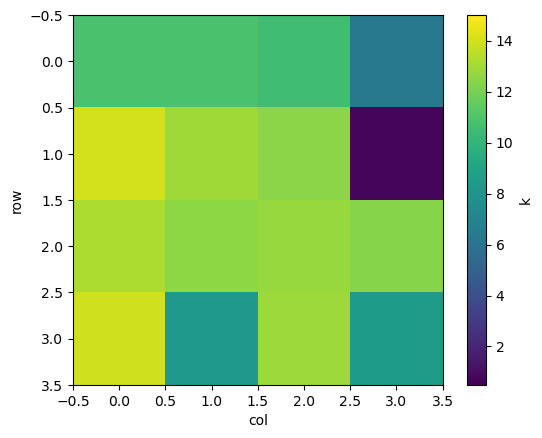

In [13]:
res = 1/cres*1e3

norm = Normalize(vmin=0.5, vmax=15)
cmap = plt.cm.viridis
im = plt.imshow(res, cmap=cmap, norm=norm)

cbar = plt.colorbar(im)
cbar.set_label("k")
plt.xlabel('col')  # 设置X轴标签
plt.ylabel('row')  # 设置Y轴标签
plt.show()  # 显示图像
plt.show()

### set操作

In [5]:
result = []

---------------------------------------set---------------------------------------


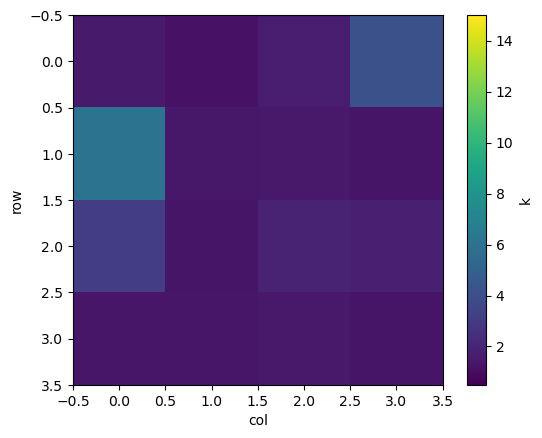

In [15]:
pulse_width = 500e-6
chip.clear_dac_v2()
chip.set_tia_gain(1)
chip.set_pulse_width(pulse_width)


print("---------------------------------------set---------------------------------------")
write_voltage = 4
tg = 2
for row in range(1,5):
    for col in range(0,4):
        chip.set_op_mode2(read=False,row=True,clearv=False)
        chip.set_pulse_width(pulse_width)
        chip.write2(row_index=[row],col_index=[col],write_voltage=write_voltage,tg=tg)


chip.set_op_mode2(read=True,row=True,clearv=False)
vres,cres = chip.read2(row_index=[1,2,3,4],col_index=[0,1,2,3],read_voltage=0.1,tg=5,check_tia=True,sum=False)


res = 1/cres*1e3
result.append(res)

norm = Normalize(vmin=0.5, vmax=15)
cmap = plt.cm.viridis
im = plt.imshow(res, cmap=cmap, norm=norm)

cbar = plt.colorbar(im)
cbar.set_label("k")
plt.title(f"脉宽:{pulse_width:.4g},set电压:{write_voltage}v,tg电压:{tg}")
plt.xlabel('col')
plt.ylabel('row')
plt.show()

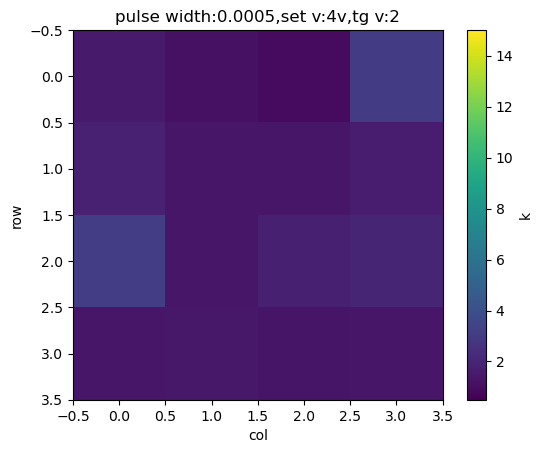

In [111]:
write_voltage = 4
tg = 2

chip.set_op_mode2(read=True,row=True,clearv=False)
vres,cres = chip.read2(row_index=[1,2,3,4],col_index=[0,1,2,3],read_voltage=0.1,tg=5,check_tia=True,sum=False)


res = 1/cres*1e3
result.append(res)

norm = Normalize(vmin=0.5, vmax=15)
cmap = plt.cm.viridis
im = plt.imshow(res, cmap=cmap, norm=norm)

cbar = plt.colorbar(im)
cbar.set_label("k")
plt.title(f"pulse width:{pulse_width:.4g},set v:{write_voltage}v,tg v:{tg}")
plt.xlabel('col')
plt.ylabel('row')
plt.show()


In [8]:
print(result[1]-result[0])

[[-3.20896866e-01  6.35946027e-01  1.78769095e+00  1.51728818e+00]
 [-9.88363754e-01 -6.60003062e-01  1.51499854e+00 -4.94444822e-04]
 [ 1.33971951e+00  4.54454433e-01 -1.30509596e-01 -2.39532955e+00]
 [-1.01191910e+00 -8.56082242e+00  5.08850745e-01  1.29939669e+00]]


In [ ]:
3v tg=1-2v,500us,间隔0.2v

### reset

In [20]:
reset_result = []

---------------------------------------reset---------------------------------------


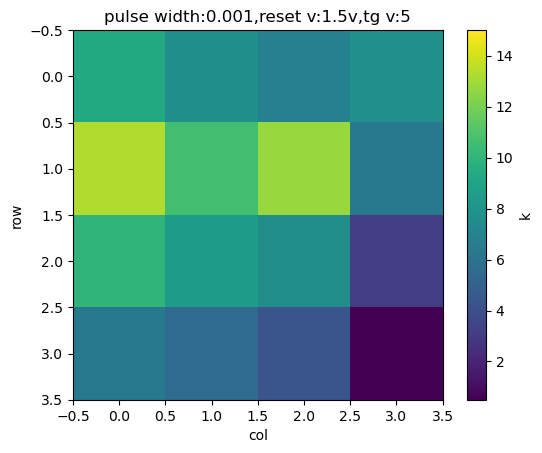

In [167]:
pulse_width = 1000e-6
chip.clear_dac_v2()
chip.set_tia_gain(1)
chip.set_pulse_width(pulse_width)

print("---------------------------------------reset---------------------------------------")
write_voltage = 1.5
tg = 5
for row in range(1,5):
    for col in range(0,4):
        # print(row,col)
        chip.set_op_mode2(read=False,row=False,clearv=False)
        chip.set_pulse_width(pulse_width)
        chip.write2(row_index=[row],col_index=[col],write_voltage=write_voltage,tg=tg)

# chip.set_op_mode2(read=False,row=False,clearv=False)
# chip.set_pulse_width(pulse_width)
# chip.write2(row_index=[4],col_index=[1],write_voltage=write_voltage,tg=tg)

# chip.set_op_mode2(read=False,row=False,clearv=False)
# chip.set_pulse_width(pulse_width)
# chip.write2(row_index=[4],col_index=[3],write_voltage=write_voltage,tg=tg)

chip.set_op_mode2(read=True,row=True,clearv=False)
vres,cres = chip.read2(row_index=[1,2,3,4],col_index=[0,1,2,3],read_voltage=0.1,tg=5,check_tia=True,sum=False)


res = 1/cres*1e3
reset_result.append(res)

norm = Normalize(vmin=0.5, vmax=15)
cmap = plt.cm.viridis
im = plt.imshow(res, cmap=cmap, norm=norm)

cbar = plt.colorbar(im)
cbar.set_label("k")
plt.title(f"pulse width:{pulse_width:.4g},reset v:{write_voltage}v,tg v:{tg}")
plt.xlabel('col')
plt.ylabel('row')
plt.show()

### set_reset

In [ ]:
3v tg=1-2v,500us,间隔0.2v

In [330]:
def set_device(row,col,write_voltage,tg,pulse_width):
    chip.set_op_mode2(read=False,row=True,clearv=False)
    chip.set_pulse_width(pulse_width)
    chip.write2(row_index=[row],col_index=[col],write_voltage=write_voltage,tg=tg)

def reset_device(row,col,write_voltage,tg,pulse_width):
    chip.set_op_mode2(read=False,row=False,clearv=False)
    chip.set_pulse_width(pulse_width)
    chip.write2(row_index=[row],col_index=[col],write_voltage=write_voltage,tg=tg)

def read_device(row,col,read_voltage,tg):
    chip.set_op_mode2(read=True,row=True,clearv=False)
    vres,cres = chip.read2(row_index=[row],col_index=[col],read_voltage=read_voltage,tg=tg,check_tia=True,sum=False)
    return 1/cres[0,0]*1e3


In [331]:
map_k_vg = [
    0,
    2.5,
    2.5,
    2.3,
    2.1,
    2.4,
    2.0,
    1.9,
    1.8,
    1.7,
    1.6
]

In [334]:
def write_and_verify(row,col,target):
    G = read_device(row,col,0.1,5)
    cont = 1
    while abs(G-target)>0.1*target:
        print(cont, end=': ') 
        if G<target:
            reset_device(row,col,1.6,5,5000e-6)
            G = read_device(row,col,0.1,5)
            print(f"{G:.2f}", end='RS  ')
        else:
            pulse_width = abs(G-target)/0.09*1e-9

            # set_device(row,col,3,map_k_vg[int(target)],min(pulse_width,10))
            set_device(row,col,2,2.5,min(pulse_width,10))
            G = read_device(row,col,0.1,5)
            print(f"{G:.2f}", end='SET   ')    
        
        cont = cont+1
        if cont>50:
            print(G)
            print("失败")
            break   
    return G

In [335]:
target = list(range(2,11,1))
index = 0
result = np.zeros((3,3))
for row in range(5,8):
    for col in range(0,3):
        print(row, col)
        resistance = target[index]        
        result[row-5,col] = write_and_verify(row,col,resistance)
        index = index+1

5 0
1: 6.17SET   2: 6.02SET   3: 5.92SET   4: 5.53SET   5: 5.99SET   6: 5.64SET   7: 5.63SET   8: 6.31SET   9: 5.98SET   10: 6.31SET   11: 5.97SET   12: 5.70SET   13: 6.18SET   14: 5.89SET   15: 5.88SET   16: 5.81SET   17: 6.38SET   18: 5.59SET   19: 5.48SET   20: 6.40SET   21: 5.74SET   22: 6.26SET   23: 5.54SET   24: 5.72SET   25: 5.75SET   26: 5.96SET   27: 5.64SET   28: 5.92SET   29: 6.14SET   30: 5.73SET   31: 5.83SET   32: 6.45SET   33: 5.61SET   34: 5.34SET   35: 6.31SET   36: 6.20SET   37: 5.60SET   38: 5.84SET   39: 5.73SET   40: 5.51SET   41: 5.59SET   42: 5.75SET   43: 5.39SET   44: 5.30SET   45: 5.73SET   46: 5.84SET   47: 5.63SET   48: 6.08SET   49: 5.78SET   50: 5.91SET   5.908499867072801
失败
5 1
1: 6.30SET   2: 6.08SET   3: 5.75SET   4: 5.49SET   5: 5.63SET   6: 5.81SET   7: 5.85SET   8: 5.76SET   9: 5.64SET   10: 5.80SET   11: 5.80SET   12: 5.67SET   13: 5.79SET   14: 5.79SET   15: 5.42SET   16: 6.16SET   17: 5.96SET   18: 6.03SET   19: 6.06SET   20: 5.65SET   21: 5.67S

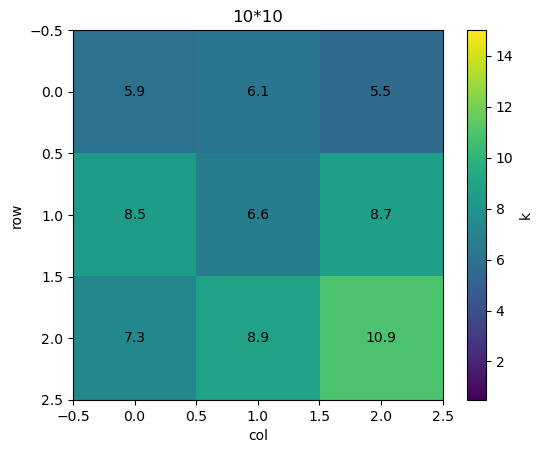

In [336]:
norm = Normalize(vmin=0.5, vmax=15)
cmap = plt.cm.viridis
im = plt.imshow(result, cmap=cmap, norm=norm)

cbar = plt.colorbar(im)

# 在每个单元格中显示数值
for i in range(result.shape[0]):
    for j in range(result .shape[1]):
        plt.text(j, i, f'{result[i,j]:.1f}', ha='center', va='center', color='black')

cbar.set_label("k")
plt.title(f"10*10")
plt.xlabel('col')
plt.ylabel('row')
plt.show()

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 2

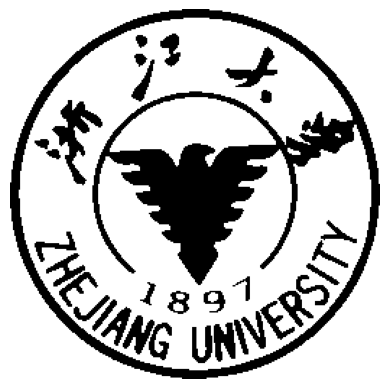

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('zju.png').convert('L')
resized_img = img.resize((256, 256), Image.LANCZOS)



threshold = 128
resized_img = np.array(resized_img)
binary_img_array = np.where(resized_img >= threshold, 255, 0).astype(np.uint8)
binary_img = Image.fromarray(binary_img_array)


resized_array = np.array(resized_img)
row,col = binary_img_array.shape
for i in range(row):
    for j in range(col):
        print(binary_img_array[i,j],end=' ')
    print('')

plt.imshow(binary_img_array, cmap='gray')
plt.axis('off')
plt.show()


binary_img.save('resized_zju.png')

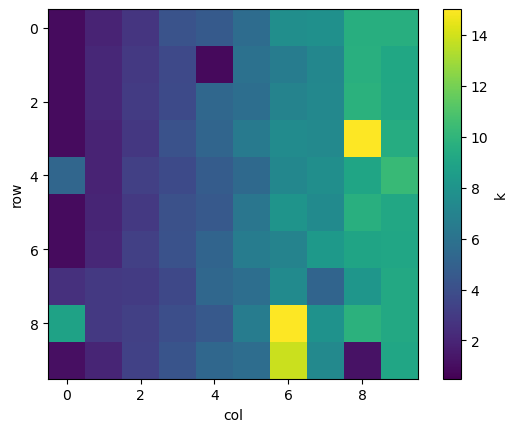

In [282]:
norm = Normalize(vmin=0.5, vmax=15)
cmap = plt.cm.viridis
im = plt.imshow(result, cmap=cmap, norm=norm)

cbar = plt.colorbar(im)
cbar.set_label("k")
plt.title(f"10*10")
plt.xlabel('col')
plt.ylabel('row')
plt.show()

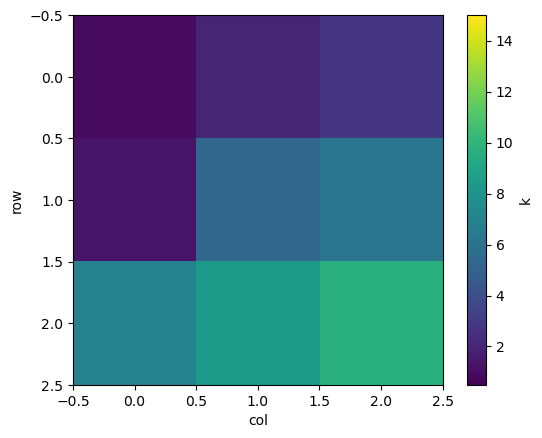

In [ ]:
norm = Normalize(vmin=0.5, vmax=15)
cmap = plt.cm.viridis
im = plt.imshow(result, cmap=cmap, norm=norm)

cbar = plt.colorbar(im)
cbar.set_label("k")
# plt.title(f"pulse width:{pulse_width:.4g},set v:{write_voltage}v,tg v:{tg}")
plt.xlabel('col')
plt.ylabel('row')
plt.show()

In [247]:
# write and verify
target = 9
G = read_device(1,0,0.1,5)
cont = 1
while abs(G-target)>0.08*target:
    print(cont, end=': ') 
    if G<target:
        reset_device(1,0,1.8,5,50000e-6)
        G = read_device(1,0,0.1,5)
        print(G, end='  RST  ')
    else:
        pulse_width = abs(G-target)/0.08*1e-6

        set_device(1,0,2,1.7,pulse_width)
        G = read_device(1,0,0.1,5)
        print(G)    
    
    cont = cont+1
    if cont>100:
        break   
        


1: 7.396409738543951  RST  2: 7.875977452265004  RST  3: -31.582669583582675  RST  4: 9.316421706071583  RST  

In [165]:
result = []
chip.set_op_mode2(read=True,row=True)
# tgg = list(range(1,2,1/16))
for row in range(1,5):
    for col in range(0,4):
        tg = 1+((row-1)*4+col)*1/15
        # print(tg)
        set_device(row,col,1,tg,5e-6)
        tmp = read_device(row,col,0.1,5)
        result.append(tmp)

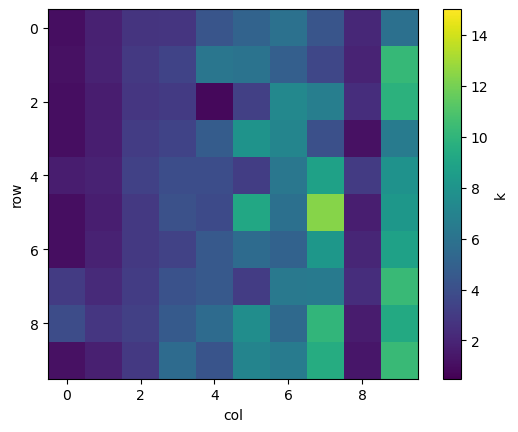

In [297]:


chip.set_op_mode2(read=True,row=True,clearv=False)
vres,cres = chip.read2(row_index=[i for i in range(5,15)],col_index=[i for i in range(10)],read_voltage=0.1,tg=5,check_tia=True,sum=False)

res = 1/cres*1e3


norm = Normalize(vmin=0.5, vmax=15)
cmap = plt.cm.viridis
im = plt.imshow(res, cmap=cmap, norm=norm)

cbar = plt.colorbar(im)
cbar.set_label("k")
# plt.title(f"pulse width:{pulse_width:.4g},set v:{write_voltage}v,tg v:{tg}")
plt.xlabel('col')
plt.ylabel('row')
plt.show()

In [135]:
result=[]

chip.set_tia_gain(1)

row = 1
col = 2

tmp = read_device(row,col,0.1,5)
result.append(tmp)
for i in range(6):
    write_voltage = 3
    tg = 1+0.2*i
    set_device(row,col,2,tg,500e-6)
    tmp = read_device(row,col,0.1,5)
    result.append(tmp)


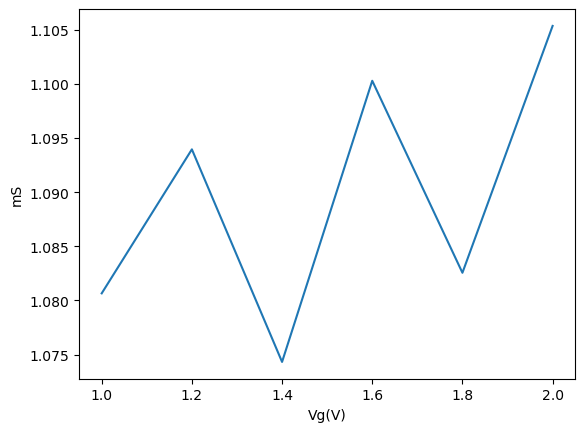

In [136]:
plt.figure()
plt.plot([1,1.2,1.4,1.6,1.8,2],1/np.array(result[1:]))

plt.ylabel('mS')
plt.xlabel('Vg(V)')
plt.show()